# Applying Temporal Convolutional Network (TCN) to time series forecasting of Well and Riser flow rates

## Author: Ridha Alkhabaz

This is notebook to explore Prophet algorithm viability to predict mass flow rates in a off-shore riser. Specifically, we are investigating gas mass flow rate in this notebook. 


## Imports:

In [20]:
import os
os.chdir('/Users/ridhaalkhabaz/Documents/GitHub/VFM_ML/src')
from preprocessing import read_data_slugging, multivariate_data, univariate_data
from configuration import configure 
os.chdir("/Users/ridhaalkhabaz/Documents/GitHub/VFM_ML")
from main import model_init, model_train, model_predict
# for tcn applications
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, RepeatVector
from tensorflow.keras.preprocessing import sequence
from tcn import TCN
import tensorflow as tf
# for data configurations
import sys
import json
import random
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import adjusted_rand_score
import datetime as dttm

#### Reading the data and visualization:

Our split here is to use the previous 10 periods to predict the last period. 

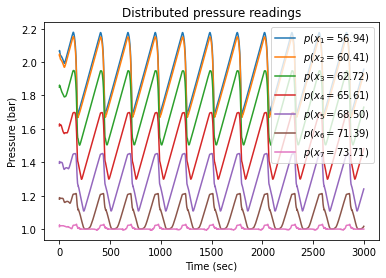

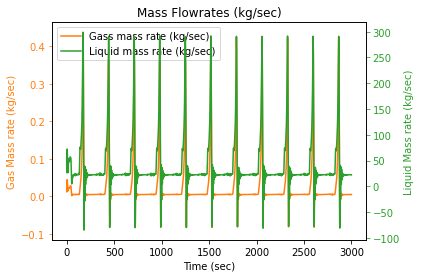

In [46]:
df,data_slugging,headers, _= read_data_slugging('riser_pq_uni.csv', plot_data=True)
## univariate data 
dt_gas_riser = np.array(df['gas(kg/sec)'])
## mutlivariate data 
df_gas_riser = df.drop('liquid(kg/sec)', axis=1)
df_gas_riser = df_gas_riser.set_index('ds')
## configuration for our training purposes
x_mult_pst, y_mult_pst = multivariate_data(np.array(df_gas_riser), 0, 2805, 300, 5, column_index=7)
x_uni, y_uni = univariate_data(np.array(dt_gas_riser), 0, 2805, 300, 5)
## configuration for testing purposes 
x_testing_mult,  y_testing_mult = multivariate_data(np.array(df_gas_riser), 2500, 2999, 300, 5, column_index=7)
x_testing_uni, y_testing_uni = univariate_data(np.array(dt_gas_riser), 2500, 2999, 300, 5)

#### Initialization:
We are trying to find the difference between univariate, multivairate, tuned and basic implementation of TCN. 

In [85]:
tcn_gas_basic_uni= model_init(model='TCN', params=['past_readings'], \
                           hyperparamters=[{'input_shape':(300,1)}, 5])
tcn_gas_basic_mult_pressure = model_init(model='TCN', params=['past_readings', 'pressure readings'], \
                           hyperparamters=[{'input_shape':(300,7)}, 5])
tcn_gas_basic_mult_pressure_tuned = model_init(model='TCN', params=['past_readings'], \
                           hyperparamters=[{'input_shape':(300,7), 'nb_filters':16, 'kernel_size':2, 'dilations':(1, 2, 4, 8)}, 5])

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_23 (TCN)                 (None, 64)                136256    
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 325       
Total params: 136,581
Trainable params: 136,581
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_24 (TCN)                 (None, 64)                137792    
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 325       
Total params: 138,117
Trainable params: 138,117
Non-trainable params: 0
_________________________________________________________________
Model: "sequential

#### Training:
We train our model on the training data.

In [86]:
history_uni_model = tcn_gas_basic_uni.fit(x_uni,y_uni, epochs=50, validation_split=0.8)

Epoch 1/50
4/4 [==============================] - 3s 429ms/step - loss: 18.8003 - val_loss: 1.5559
Epoch 2/50
4/4 [==============================] - 2s 466ms/step - loss: 1.4377 - val_loss: 0.3770
Epoch 3/50
4/4 [==============================] - 1s 294ms/step - loss: 0.3366 - val_loss: 0.2143
Epoch 4/50
4/4 [==============================] - 1s 290ms/step - loss: 0.2544 - val_loss: 0.1861
Epoch 5/50
4/4 [==============================] - 1s 291ms/step - loss: 0.1946 - val_loss: 0.1248
Epoch 6/50
4/4 [==============================] - 1s 290ms/step - loss: 0.1075 - val_loss: 0.0812
Epoch 7/50
4/4 [==============================] - 1s 292ms/step - loss: 0.0842 - val_loss: 0.0754
Epoch 8/50
4/4 [==============================] - 1s 297ms/step - loss: 0.0694 - val_loss: 0.0519
Epoch 9/50
4/4 [==============================] - 1s 294ms/step - loss: 0.0477 - val_loss: 0.0384
Epoch 10/50
4/4 [==============================] - 1s 296ms/step - loss: 0.0389 - val_loss: 0.0340
Epoch 11/50
4/4 [=

In [87]:
history_mult_model_pst = tcn_gas_basic_mult_pressure.fit(x_mult_pst,y_mult_pst, epochs=100, validation_split=0.8)

Epoch 1/100
4/4 [==============================] - 4s 547ms/step - loss: 188.8384 - val_loss: 1.3957
Epoch 2/100
4/4 [==============================] - 1s 291ms/step - loss: 1.8268 - val_loss: 0.8879
Epoch 3/100
4/4 [==============================] - 1s 291ms/step - loss: 1.0948 - val_loss: 0.4542
Epoch 4/100
4/4 [==============================] - 1s 290ms/step - loss: 0.5086 - val_loss: 0.3374
Epoch 5/100
4/4 [==============================] - 1s 295ms/step - loss: 0.3353 - val_loss: 0.3407
Epoch 6/100
4/4 [==============================] - 1s 295ms/step - loss: 0.3257 - val_loss: 0.4817
Epoch 7/100
4/4 [==============================] - 1s 290ms/step - loss: 0.4218 - val_loss: 0.1778
Epoch 8/100
4/4 [==============================] - 1s 296ms/step - loss: 0.2073 - val_loss: 0.1932
Epoch 9/100
4/4 [==============================] - 1s 307ms/step - loss: 0.2127 - val_loss: 0.1660
Epoch 10/100
4/4 [==============================] - 1s 297ms/step - loss: 0.1478 - val_loss: 0.1205
Epoch 1

Epoch 83/100
4/4 [==============================] - 1s 397ms/step - loss: 0.0233 - val_loss: 0.0174
Epoch 84/100
4/4 [==============================] - 2s 445ms/step - loss: 0.0183 - val_loss: 0.0244
Epoch 85/100
4/4 [==============================] - 1s 347ms/step - loss: 0.0193 - val_loss: 0.0384
Epoch 86/100
4/4 [==============================] - 1s 323ms/step - loss: 0.0383 - val_loss: 0.0344
Epoch 87/100
4/4 [==============================] - 1s 328ms/step - loss: 0.0243 - val_loss: 0.0192
Epoch 88/100
4/4 [==============================] - 1s 331ms/step - loss: 0.0254 - val_loss: 0.0145
Epoch 89/100
4/4 [==============================] - 2s 501ms/step - loss: 0.0174 - val_loss: 0.0149
Epoch 90/100
4/4 [==============================] - 2s 477ms/step - loss: 0.0128 - val_loss: 0.0146
Epoch 91/100
4/4 [==============================] - 1s 364ms/step - loss: 0.0168 - val_loss: 0.0169
Epoch 92/100
4/4 [==============================] - 1s 305ms/step - loss: 0.0145 - val_loss: 0.0344


In [88]:
history_mult_model_pst_tuned = tcn_gas_basic_mult_pressure_tuned.fit(x_mult_pst,y_mult_pst, epochs=100, validation_split=0.8)

Epoch 1/100
4/4 [==============================] - 2s 161ms/step - loss: 3.5087 - val_loss: 2.0926
Epoch 2/100
4/4 [==============================] - 0s 63ms/step - loss: 1.9612 - val_loss: 1.1293
Epoch 3/100
4/4 [==============================] - 0s 60ms/step - loss: 1.0892 - val_loss: 0.6497
Epoch 4/100
4/4 [==============================] - 1s 209ms/step - loss: 0.6325 - val_loss: 0.3917
Epoch 5/100
4/4 [==============================] - 0s 61ms/step - loss: 0.3701 - val_loss: 0.2365
Epoch 6/100
4/4 [==============================] - 0s 81ms/step - loss: 0.2242 - val_loss: 0.1430
Epoch 7/100
4/4 [==============================] - 0s 132ms/step - loss: 0.1455 - val_loss: 0.0868
Epoch 8/100
4/4 [==============================] - 0s 103ms/step - loss: 0.0862 - val_loss: 0.0598
Epoch 9/100
4/4 [==============================] - 0s 97ms/step - loss: 0.0627 - val_loss: 0.0431
Epoch 10/100
4/4 [==============================] - 1s 211ms/step - loss: 0.0450 - val_loss: 0.0332
Epoch 11/100
4

4/4 [==============================] - 0s 76ms/step - loss: 0.0147 - val_loss: 0.0113
Epoch 84/100
4/4 [==============================] - 0s 76ms/step - loss: 0.0136 - val_loss: 0.0112
Epoch 85/100
4/4 [==============================] - 0s 67ms/step - loss: 0.0112 - val_loss: 0.0113
Epoch 86/100
4/4 [==============================] - 0s 60ms/step - loss: 0.0135 - val_loss: 0.0113
Epoch 87/100
4/4 [==============================] - 0s 109ms/step - loss: 0.0120 - val_loss: 0.0121
Epoch 88/100
4/4 [==============================] - 0s 79ms/step - loss: 0.0132 - val_loss: 0.0112
Epoch 89/100
4/4 [==============================] - 0s 79ms/step - loss: 0.0136 - val_loss: 0.0111
Epoch 90/100
4/4 [==============================] - 0s 67ms/step - loss: 0.0107 - val_loss: 0.0109
Epoch 91/100
4/4 [==============================] - 1s 123ms/step - loss: 0.0112 - val_loss: 0.0109
Epoch 92/100
4/4 [==============================] - 0s 73ms/step - loss: 0.0110 - val_loss: 0.0108
Epoch 93/100
4/4 [===

#### Testing and visualization:
Here we use the testing data to find TCN accuracy. 

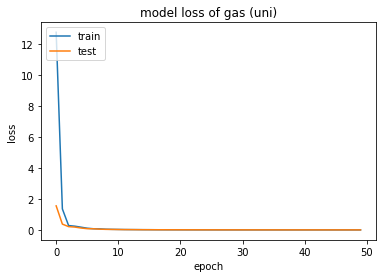

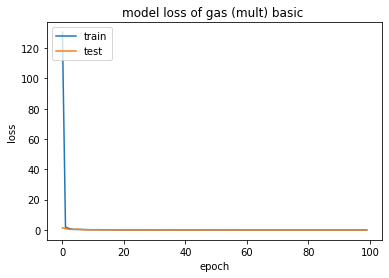

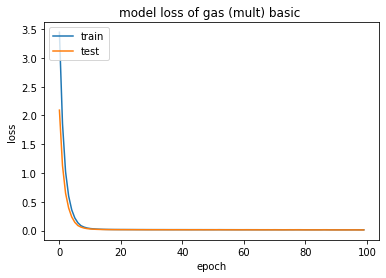

In [89]:
## GAS 
# summarize history for loss
plt.plot(history_uni_model.history['loss'])
plt.plot(history_uni_model.history['val_loss'])
plt.title('model loss of gas (uni)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_mult_model_pst.history['loss'])
plt.plot(history_mult_model_pst.history['val_loss'])
plt.title('model loss of gas (mult) basic ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_mult_model_pst_tuned.history['loss'])
plt.plot(history_mult_model_pst_tuned.history['val_loss'])
plt.title('model loss of gas (mult) basic ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [90]:
## gas testing data set visualization
### univariate 
real_gas_uni = y_testing_uni.flatten()
pred_gas_uni = tcn_gas_basic_uni.predict(x_testing_uni).flatten()
df_plot_gas_uni=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([pred_gas_uni, real_gas_uni]))))
df_plot_gas_uni['ds']=range(2800,2995)
# ### multivariate 
real_gas_mult = y_testing_mult.flatten()
pred_gas_mult = tcn_gas_basic_mult_pressure.predict(x_testing_mult).flatten()
df_plot_gas_mult=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([pred_gas_mult, real_gas_mult]))))
df_plot_gas_mult['ds']=range(2800,3000)
# ### multivariate 
real_gas_mult_pst = y_testing_mult.flatten()
pred_gas_mult_pst = tcn_gas_basic_mult_pressure_tuned.predict(x_testing_mult).flatten()
df_plot_gas_mult_pst=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([pred_gas_mult_pst, real_gas_mult_pst]))))
df_plot_gas_mult_pst['ds']=range(2800,3000)

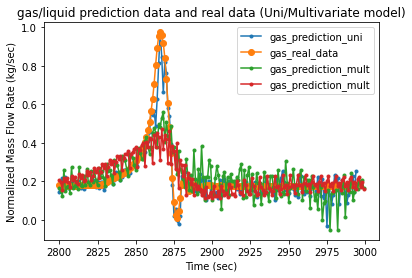

In [93]:
start = 0
end = 1000
fig,ax = plt.subplots()
ax.set_title('gas/liquid prediction data and real data (Uni/Multivariate model)')
ax.plot(df_plot_gas_uni['ds'].iloc[start:end], df_plot_gas_uni['prediction'].iloc[start:end], marker=".", label='gas_prediction_uni')
ax.plot(df_plot_gas_uni['ds'].iloc[start:end], df_plot_gas_uni['real'].iloc[start:end], marker="o", label='gas_real_data')
ax.set_xlabel('Time (sec)')
ax.set_ylabel('Normalized Mass Flow Rate (kg/sec)')
ax.plot(df_plot_gas_mult['ds'].iloc[start:end], df_plot_gas_mult['prediction'].iloc[start:end], marker=".", label='gas_prediction_mult')
ax.plot(df_plot_gas_mult_pst['ds'].iloc[start:end], df_plot_gas_mult_pst['prediction'].iloc[start:end], marker=".", label='gas_prediction_mult')
ax.legend()

In [94]:
[mse(df_plot_gas_uni['real'], df_plot_gas_uni['prediction']),
mse(df_plot_gas_mult['real'], df_plot_gas_mult['prediction']),
mse(df_plot_gas_uni['real'], df_plot_gas_uni['prediction'])]

[0.002822353323395543]